In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [23]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'absth',
            'wgt',
           'planck_wgt_flux']


def pattern_assign(name):
    return ''' 
    parameter .* :: .* ({} .* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/]+ {}[^,] [^/]+ / [^/]+ /)
    '''.format(name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_7',
                          'g_ascending',
                          'refPTs_P_200_T_250__P_1_T_250',
                          'ighigh_5',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_.8_.75_.7_.65_.6__.6_.9',
                          'dgs',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_7',
                          'g_ascending',
                          'refPTs_P_200_T_250__P_1_T_250',
                          'ighigh_5',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_.8_.75_.7_.65_.6__.6_.9',
                          'dgs',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 7 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [24]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 340

nband = 200

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_1 = 200.

temperature_reference_1 = 250.

pressure_reference_2 = 1.

temperature_reference_2 = 250.

ighigh = 5

ngas = 6      

ng = 7

data absth(:, 1) /

!     thresholds for reference (P, T) low
!     data absth(:, 2) /

wgt_flux = .true.

data wgt
     &     /.8, .75, .7, .65, .6, .6, .9/

planck_wgt_flux = .true.

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

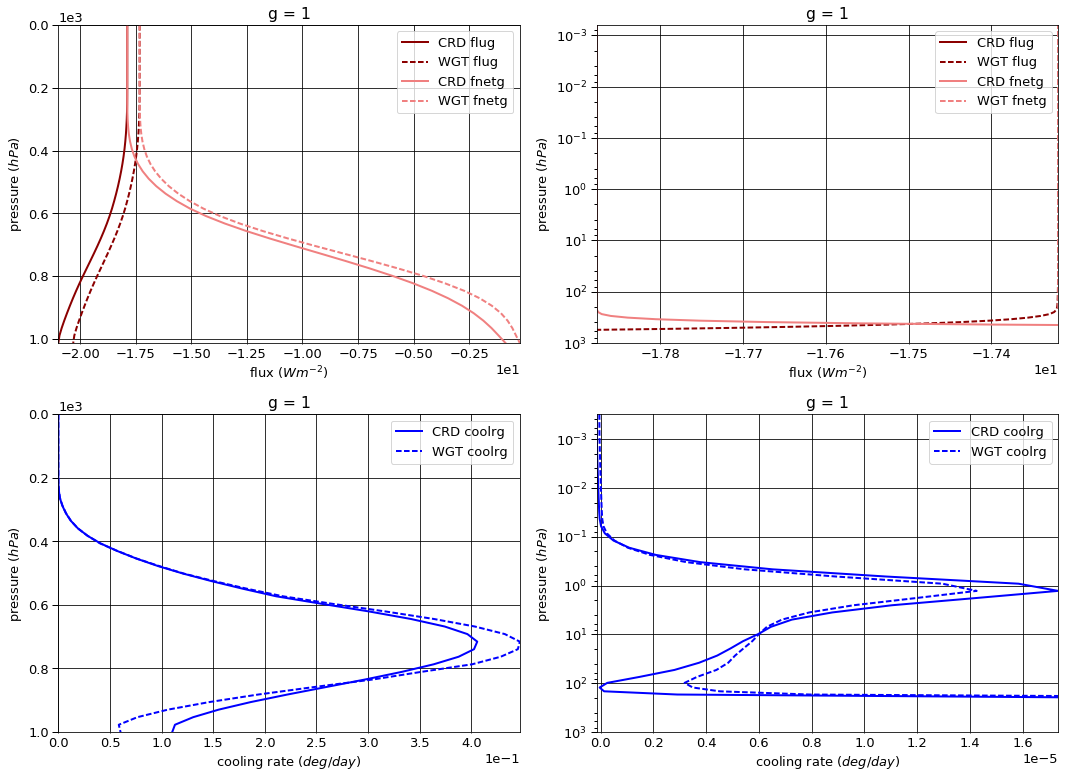

# Figure: flux, cooling rate g-group 2

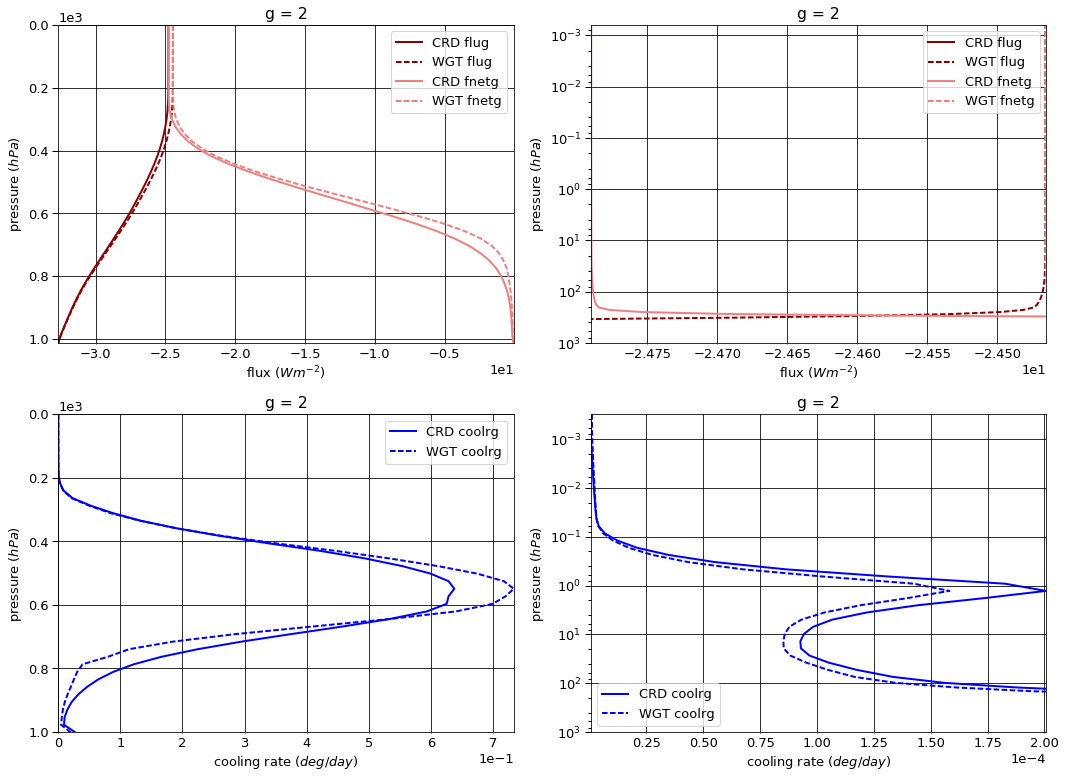

# Figure: flux, cooling rate g-group 3

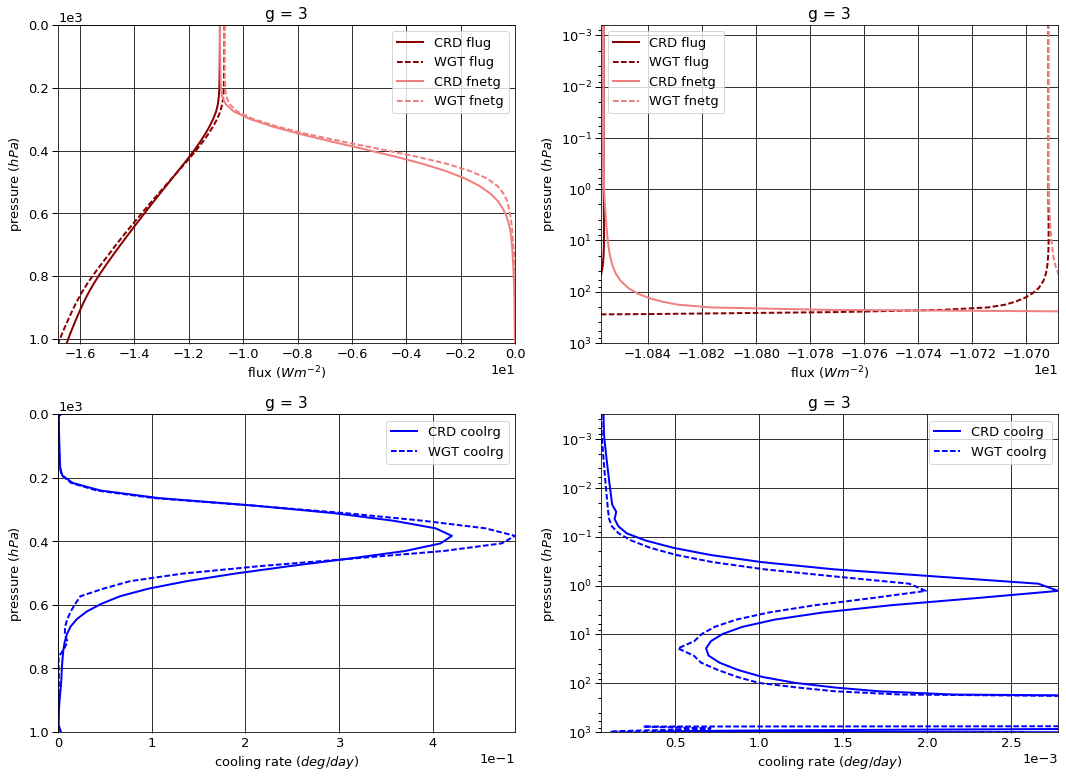

# Figure: flux, cooling rate g-group 4

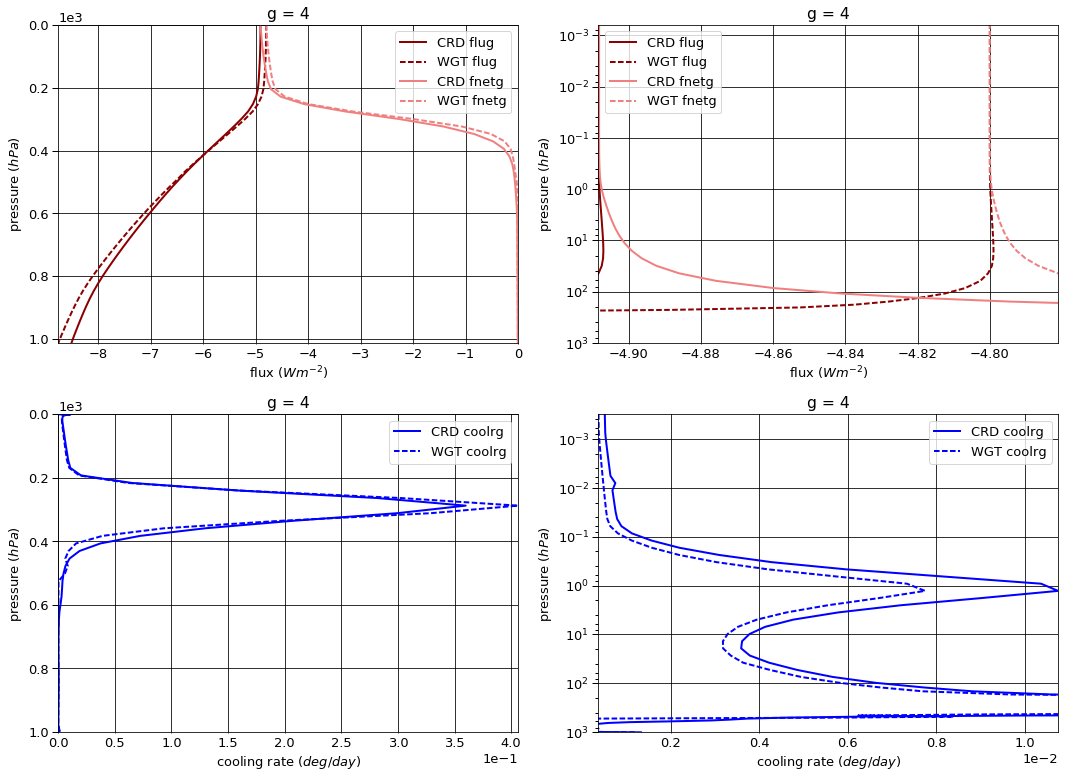

# Figure: flux, cooling rate g-group 5

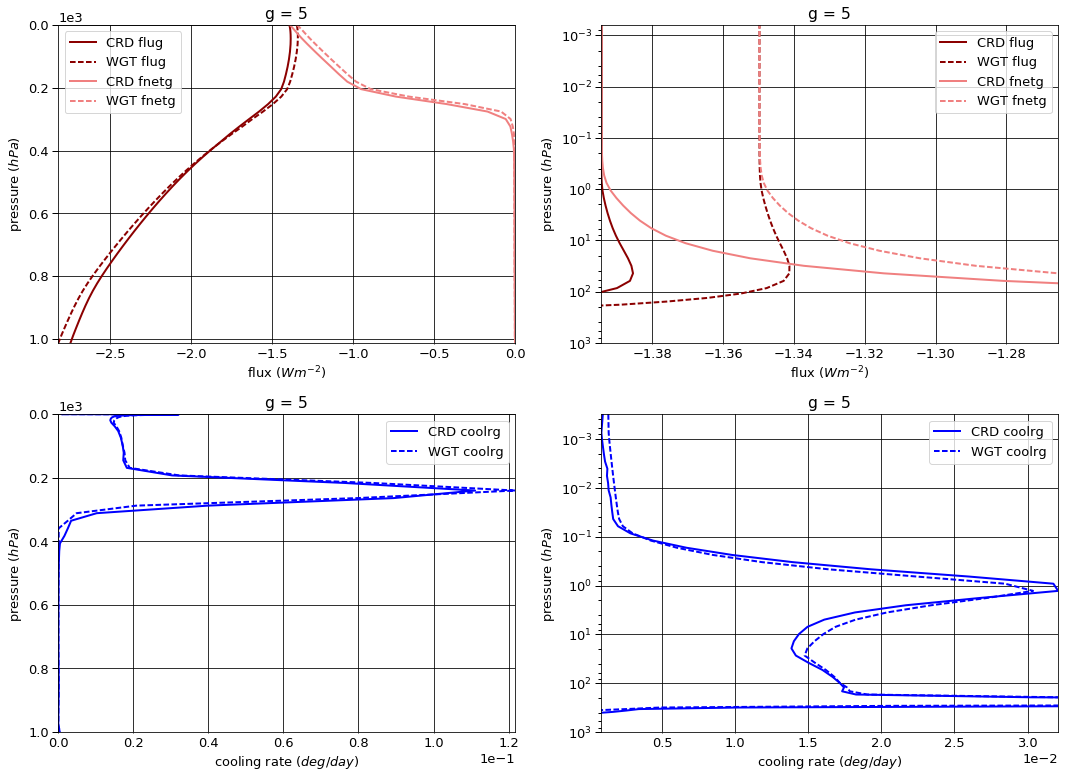

# Figure: flux, cooling rate g-group 6

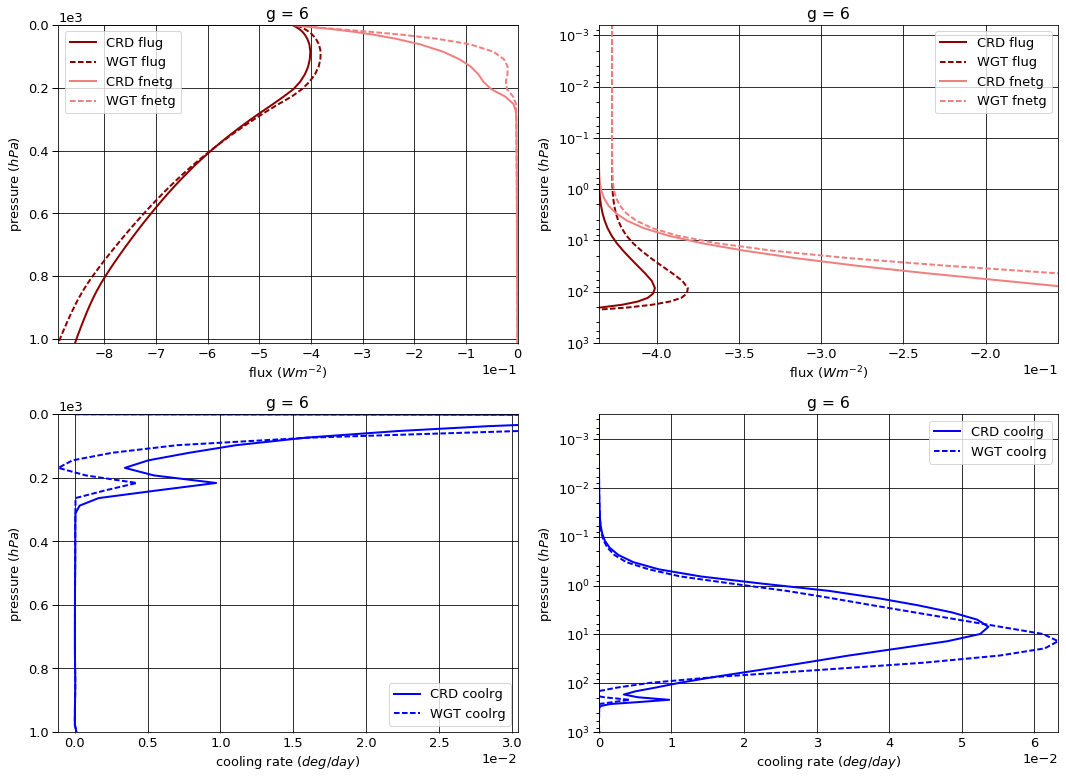

# Figure: flux, cooling rate g-group 7

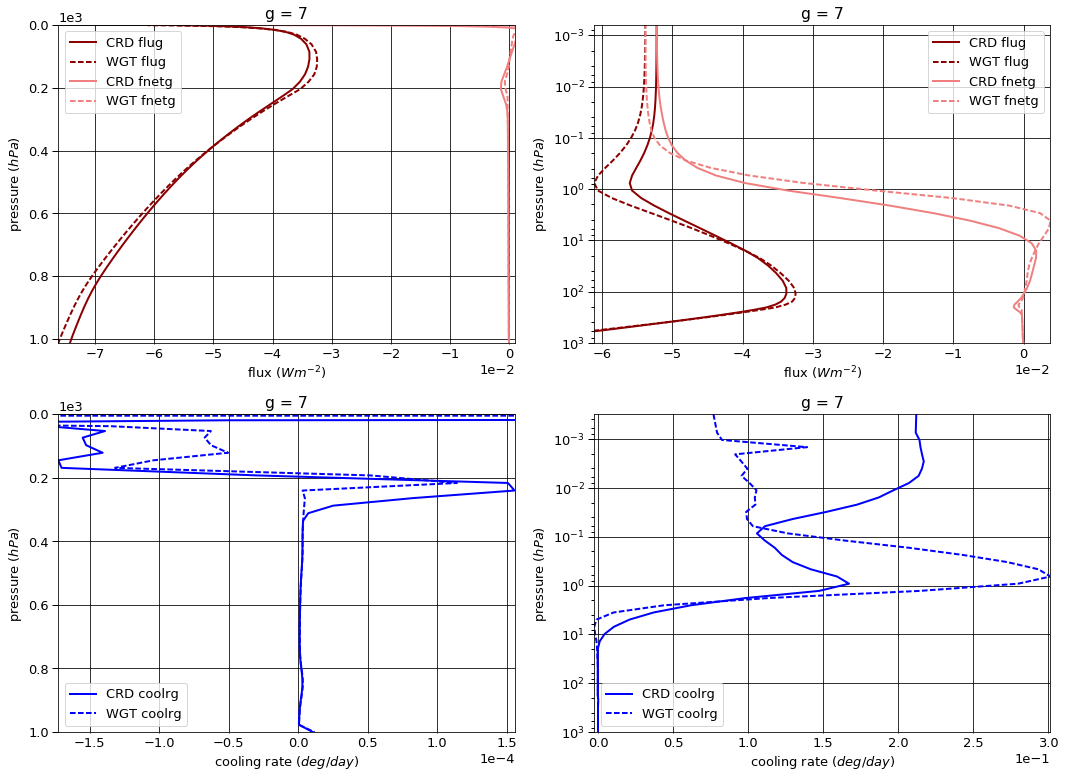

# Figure: flux, cooling rate g-group total

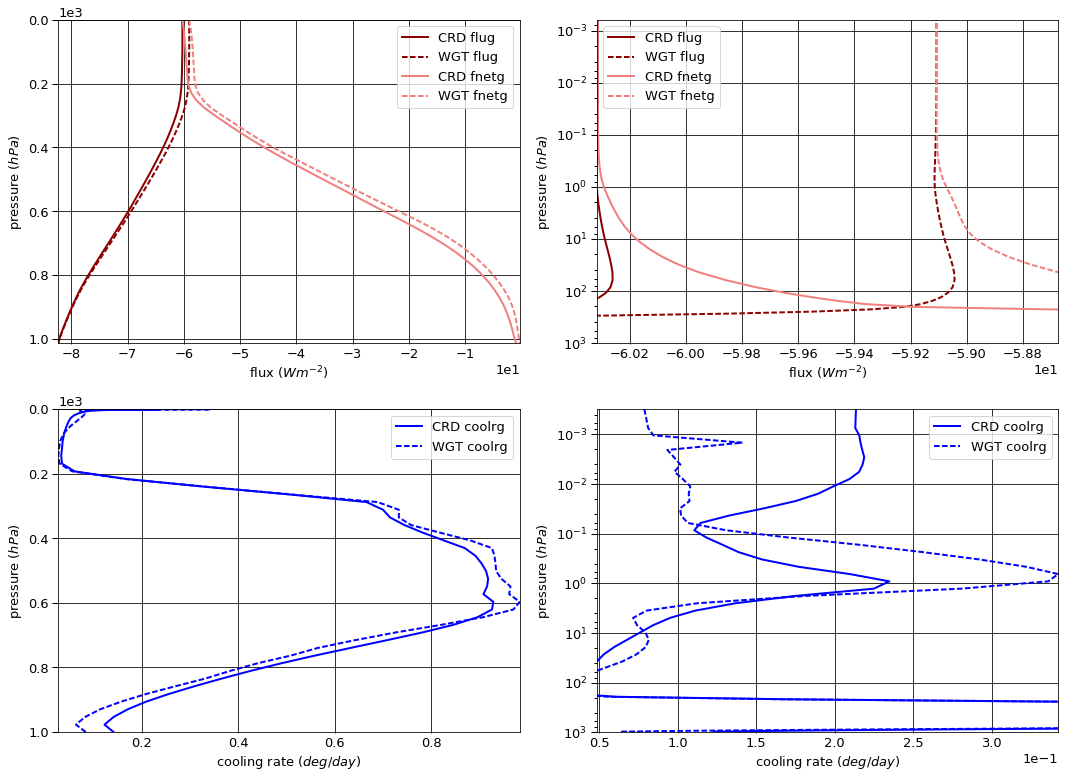

In [16]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [17]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -17.876971   0.000000 -17.876971
  1013.0   76    -20.975478  20.101309  -0.874169
2 0.0      1     -24.790056   0.000000 -24.790056
  1013.0   76    -32.673260  32.594424  -0.078836
3 0.0      1     -10.856452   0.000000 -10.856452
  1013.0   76    -16.484482  16.476455  -0.008027
4 0.0      1      -4.908218   0.000000  -4.908218
  1013.0   76     -8.507930   8.504533  -0.003397
5 0.0      1      -1.394285   0.000000  -1.394285
  1013.0   76     -2.744258   2.743157  -0.001101
6 0.0      1      -0.435113   0.000000  -0.435113
  1013.0   76     -0.856180   0.855845  -0.000335
7 0.0      1      -0.052216   0.000000  -0.052216
  1013.0   76     -0.074241   0.074211  -0.000030


WGT


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -17.319502   0.000000 -17.319502
  1013.0   76    -20.306324  20.074481  -0.231843
2 0.0      1     -24.465840   0.000000 -24.465840
  1013.0   76    -32.673633  32.622467  -0.051166
3 0.0      1     -10.691891   0.000000 -10.691891
  1013.0   76    -16.794239  16.787062  -0.007177
4 0.0      1      -4.799970   0.000000  -4.799970
  1013.0   76     -8.757850   8.754108  -0.003743
5 0.0      1      -1.349707   0.000000  -1.349707
  1013.0   76     -2.819036   2.817831  -0.001205
6 0.0      1      -0.427123   0.000000  -0.427123
  1013.0   76     -0.888545   0.888165  -0.000380
7 0.0      1      -0.053825   0.000000  -0.053825
  1013.0   76     -0.076202   0.076170  -0.000033


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.557469  0.000000  0.557469
  1013.0   76     0.669154 -0.026828  0.642326
2 0.0      1      0.324216  0.000000  0.324216
  1013.0   76    -0.000373  0.028043  0.027670
3 0.0      1      0.164561  0.000000  0.164561
  1013.0   76    -0.309757  0.310607  0.000851
4 0.0      1      0.108248  0.000000  0.108248
  1013.0   76    -0.249920  0.249575 -0.000345
5 0.0      1      0.044578  0.000000  0.044578
  1013.0   76    -0.074778  0.074674 -0.000103
6 0.0      1      0.007990  0.000000  0.007990
  1013.0   76    -0.032365  0.032320 -0.000045
7 0.0      1     -0.001609  0.000000 -0.001609
  1013.0   76    -0.001961  0.001959 -0.000003

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.497176e-07
  1001.112500 75     1.102318e-01
2 0.000312    1      4.121678e-07
  1001.112500 75     2.722757e-02
3 0.000312    1      7.352178e-05
  1001.112500 75     2.960033e-03
4 0.000312    1      5.121943e-04
  1001.112500 75     1.227217e-03
5 0.000312    1      9.576950e-04
  1001.112500 75     3.978340e-04
6 0.000312    1      1.056262e-05
  1001.112500 75     1.210368e-04
7 0.000312    1      2.119588e-01
  1001.112500 75     1.078347e-05


WGT


coolrg
g pressure    layer              
1 0.000312    1     -4.726408e-08
  1001.112500 75     6.029539e-02
2 0.000312    1      9.978294e-07
  1001.112500 75     1.986647e-02
3 0.000312    1      6.080474e-05
  1001.112500 75     2.591838e-03
4 0.000312    1      3.698398e-04
  1001.112500 75     1.351590e-03
5 0.000312    1      1.331702e-03
  1001.112500 75     4.350589e-04
6 0.000312    1      9.740272e-06
  1001.112500 75     1.371282e-04
7 0.000312    1      7.689362e-02
  1001.112500 75     1.176023e-05


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      1.024536e-07
  1001.112500 75    -4.993642e-02
2 0.000312    1      5.856616e-07
  1001.112500 75    -7.361098e-03
3 0.000312    1     -1.271704e-05
  1001.112500 75    -3.681951e-04
4 0.000312    1     -1.423545e-04
  1001.112500 75     1.243727e-04
5 0.000312    1      3.740067e-04
  1001.112500 75     3.722488e-05
6 0.000312    1     -8.223471e-07
  1001.112500 75     1.609142e-05
7 0.000312    1     -1.350652e-01
  1001.112500 75     9.767640e-07

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.313310,0.000000,-60.313310
1013.0,76,-82.315829,81.349934,-0.965896



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-59.107857,0.000000,-59.107857
1013.0,76,-82.315829,82.020284,-0.295545



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,1.205453e+00,0.00000,1.205453
1013.0,76,-5.400001e-08,0.67035,0.670351


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.213513
1001.112500,75,0.142176



WGT


,,coolrg
pressure,layer,
0.000312,1,0.078667
1001.112500,75,0.084689



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.134846
1001.112500,75,-0.057487


In [18]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.240450,0.246688
2,0.394425,0.396930
3,0.208150,0.204022
4,0.109600,0.106393
5,0.035200,0.034247
6,0.011225,0.010794
7,0.000950,0.000926


In [19]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.409652e-23
2,1.248657e-22
3,1.106048e-21
4,9.797272e-21
5,8.678331e-20
6,1.515104e-19


In [25]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')